# Set up your notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('/Users/Jarence/desktop/ds-sg-04/projects/unit-projects/project-4/assets/titanic.csv')

In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Executive Summary

- Come back to this after your analysis has been completed.

# Problem Statement

## What are you trying to find out?

I want to find out if any of the factors being age,sex,pclass etc affects or has association with the chances of surviving the Titanic disaster. 

## What is your dataset about?

My dataset includes each passenger's details boarding the Titanic ship and we can observe whether 891 passengers of the Titanic survived or perished, and the relationship with several variables. I believe that the main outcome of the dataset would be the "survived" factor as it shows us whether the specific passsenger had survived the journey. P class being passeger class, containing classes from 1-3. Name, Sex, Age, Fare, Ticket, Cabin, these factors can be explain by the meaning of their names. Sibsp refers to how many siblings or spouses the passenger has aboard, while Parch refers to how many parents or children the passenger has aboard. Lastly, Embarked refers to the port of embarktion, C refers to Cherbourg, Q refers to Queenstown and S refers to Southampton. 

## Risks and Assumptions

## Hypothesis

Null hypothesis: There is not relationship between passengers class and passengers survival.

Alternative hypothesis: The higher the passenger's class is, the higher chance of survival. 

## Success Metrics

- __This is something you might consider for your final project. However, we will skip this for Project 4.__

# Exploratory Data Analysis

- Include visualizations, descriptive statistics, etc.

In [5]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
titanic_data['Survived'].mean()

0.3838383838383838

In [8]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

- Prepare your dataset for modeling

In [9]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
titanic_data = titanic_data.drop(['Cabin'], axis=1)

In [11]:
titanic_data = titanic_data.dropna()

In [12]:
titanic_data.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

In [13]:
titanic_data.groupby("Pclass")["Survived"].mean() 

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [14]:
pclass_dummies = pd.get_dummies(titanic_data['Pclass'], prefix = "Pclass", drop_first = True)

In [15]:
titanic_data = pd.concat([titanic_data, pclass_dummies], axis = 1)

In [16]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

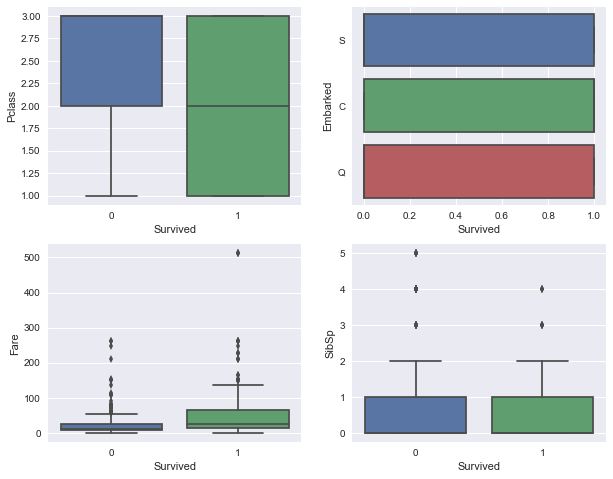

In [17]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x="Survived", y="Pclass", data=titanic_data, ax=ax[0,0])
sns.boxplot(x="Survived", y="Embarked", data=titanic_data, ax=ax[0,1])
sns.boxplot(x="Survived", y="Fare", data=titanic_data, ax=ax[1,0])
sns.boxplot(x="Survived", y="SibSp", data=titanic_data, ax=ax[1,1])

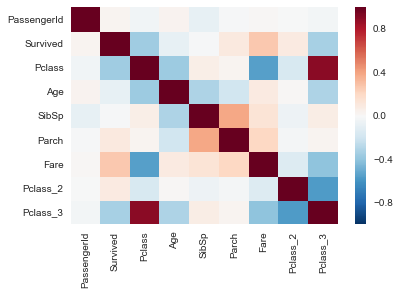

In [18]:
sns.heatmap(titanic_data.corr())

USING STATSMODELS

In [19]:
lm_single = smf.logit(formula = "Survived ~ Pclass", data=titanic_data).fit()

Optimization terminated successfully.
         Current function value: 0.610337
         Iterations 5


In [20]:
lm_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Jul 2017   Pseudo R-squ.:                 0.09552
Time:                        18:29:55   Log-Likelihood:                -434.56
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 9.668e-22
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5998      0.229      6.984      0.000         1.151     2.049
Pclass        -0.9045      0.099     -9.165      0.000        -1.098    -0.711
==============================================================================
"""

In [21]:
lm_single.params

Intercept    1.599803
Pclass      -0.904468
dtype: float64

In [22]:
using sk learn

SyntaxError: invalid syntax (<ipython-input-22-cb44fc1d7c95>, line 1)

In [23]:
factors = ["Pclass_2", "Pclass_3"]
lm2 = LogisticRegression().fit(titanic_data[factors], titanic_data["Survived"])

In [24]:
lm2.coef_

array([[-0.62673834, -1.69007727]])

In [25]:
accuracy_score(titanic_data["Survived"], lm2.predict(titanic_data[factors]))

0.6741573033707865

In [26]:
precision_score(titanic_data["Survived"], lm2.predict(titanic_data[factors]))

0.65217391304347827

In [27]:
recall_score(titanic_data["Survived"], lm2.predict(titanic_data[factors]))

0.41666666666666669

In [28]:
np.exp(lm2.coef_)

array([[ 0.53433177,  0.18450527]])

# What does your analysis show?

From the logistics regression model i have created, from np.exp(lm2.coef), from the accuracy_score, my model's accuracy is around 0.67 which is not too far from 1 so it is doing quite ok.  As for precision and recall score, they help to reflect how many of the predictions were correct, similarly both are doing ok..

# Bonus

## Impute missing values

- Which columns have missing values that you could impute rather than dropping the whole row?

## Visualize a decision tree classifier

[Example of a visualization](http://scikit-learn.org/stable/_images/iris.svg)  
[sklearn reference](http://scikit-learn.org/stable/modules/tree.html)